In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Estimated_AA_neh_numbers_liverpool_kidney_.csv")
data=data.dropna()
data=data.sort_values(by="Tritium")
print(data.shape)
data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
data.head(20)

(20, 8)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,symbol
18,Tryptophan (W),0.08,0.288820,0.352239,0.025127,0.163177,0.184520,0.312292,W
16,Threonine (T),0.20,0.226421,0.237922,0.200059,0.072810,0.078814,0.141961,T
4,Phenylalanine (F),0.32,0.605382,0.658028,0.808661,0.090022,0.098455,0.176345,F
19,Tyrosine (Y),0.42,0.628694,0.760534,0.811217,0.098234,0.108288,0.186305,Y
8,lysine (K),0.54,0.193595,0.150584,0.000000,0.143310,0.168055,0.279474,K
17,Valine (V),0.56,0.801854,0.791665,0.816336,0.061889,0.069669,0.125485,V
9,Leucine (L),0.60,0.957011,0.885550,0.895794,0.055242,0.061843,0.103740,L
7,Isoleucine (I),1.00,0.972768,0.858073,1.025541,0.075050,0.083979,0.145499,I
10,Methionine (M),1.12,0.896506,0.652302,0.825678,0.119713,0.145562,0.240732,M
1,Cysteine (C),1.62,1.721093,1.824521,1.997433,0.143559,0.165228,0.273369,C


In [3]:
data.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.866200,0.865224,0.852977,-0.121109,-0.129332,-0.147304
Asym_NEH,0.866200,1.000000,0.997001,0.994414,-0.284342,-0.282326,-0.309348
APE,0.865224,0.997001,1.000000,0.995343,-0.278918,-0.281498,-0.306600
MPE,0.852977,0.994414,0.995343,1.000000,-0.324715,-0.323895,-0.350276
Asym_NEH_ci,-0.121109,-0.284342,-0.278918,-0.324715,1.000000,0.995698,0.998012
APE_ci,-0.129332,-0.282326,-0.281498,-0.323895,0.995698,1.000000,0.995983
MPE_ci,-0.147304,-0.309348,-0.306600,-0.350276,0.998012,0.995983,1.000000


In [4]:
Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data.Tritium - data.APE)/data.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data.Tritium - data.MPE)/data.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.3764736209779006 0.5445604606100024
APE 0.37320197087431384 0.705183280489111
MPE 0.34159743400521847 0.37213128070878687


In [5]:
# data2=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_utmb-liver_.csv")
# data2=data2.dropna()
# data2=data2.sort_values(by="Tritium")
# print(data2.shape)
# data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
# # data2.head(20)

In [6]:
# data2.corr()

In [7]:
# Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
# print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

# APE=abs(data2.Tritium - data2.APE)/data2.Tritium
# print('APE',np.median(APE),np.std(APE))

# MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
# print('MPE',np.median(MPE),np.std(MPE))

In [8]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

In [9]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.xticks(range(0,40,2),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


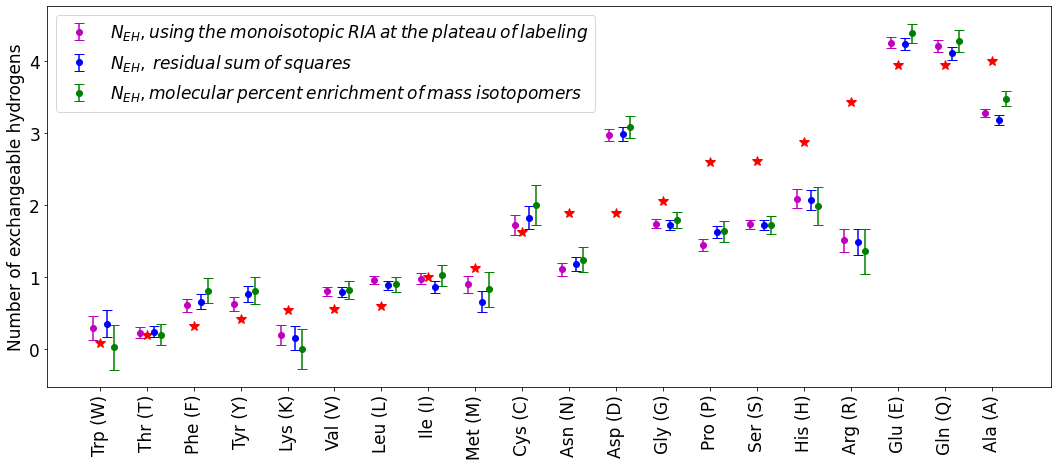

In [10]:
plot_neh_aa(data,'lv')
# plot_neh_aa(data2,'utmb')

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


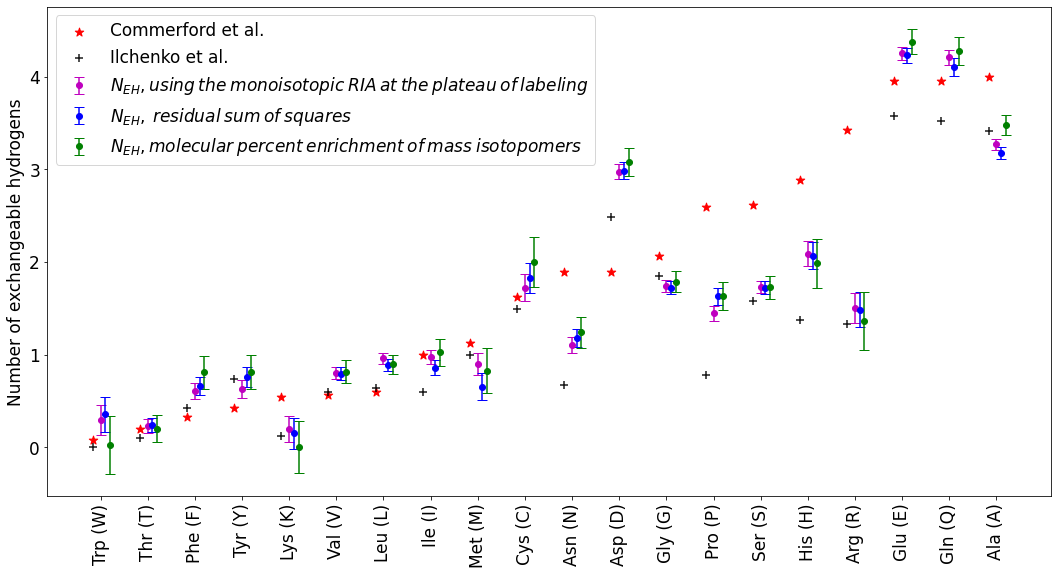

In [11]:
il={'A':3.41,     'C':1.49,     'D':2.490,     'E':3.58,     'F':0.418,     'G':1.844,    'H':1.372,     'I':0.592,
     'K':0.121,     'L':0.634,     'M':0.994,     'N':0.674,    'P':0.78,     'Q':3.517,     'R':1.326,     'S':1.574,
     'T':0.097,    'V':0.591,     'W':0.003,     'Y':0.74}
ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
data["il"]=[il[c] for c in data.symbol]
data["ck"]=[ck[c] for c in data.symbol]

def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,9)) 
#     plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10,label='Commerford et al.')
    
    
    temp_x=[x-0.5 for x in range(0,60,3)]    
    plt.scatter(temp_x, input_data['Tritium'],marker='*',s=80, color="r",label='Commerford et al.')    
    plt.scatter(temp_x, input_data['il'],marker='+',s=80, color="k",alpha=0.9,label='Ilchenko et al.')
#     plt.scatter(temp_x, input_data['ck'],marker='x',s=80, color="k",alpha=0.7,label='Peinado‐Izaguerri, Jorge, et al.')
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        k=i
#         if i ==0: k=-1
#         else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,60,3)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,60,3),input_data.AA_name,rotation=90)
    plt.xticks(range(0,60,3),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
#     plt.grid()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()
    
plot_neh_aa(data,'lv2')

In [12]:
# sorted(aa_sh_name.values(),key= lambda x: x[1])